# learn about simulation

In [1]:
import sys
import os

# Add the current working directory to sys.path
sys.path.append(os.path.abspath('..'))

# Print sys.path to verify the change
print(sys.path)

['/home/lpr/project_nattabude/carla/self-driving-sb3/notebook', '/home/lpr', '/home/lpr/miniconda3/envs/TRT86/lib/python38.zip', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8/lib-dynload', '', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8/site-packages', '/home/lpr/project_nattabude/carla/self-driving-sb3']


In [2]:
import matplotlib.pyplot as plt

### test world

In [3]:
import carla

client = carla.Client('localhost', 2000)
client.set_timeout(120)
world = client.get_world()  


In [ ]:
settings = world.get_settings()
settings.fixed_delta_seconds = 0.2
settings.synchronous_mode = True
settings.max_substeps = 16
settings.max_substep_delta_time = 0.0125
world.apply_settings(settings)
client.reload_world(False)

In [4]:
from utils.tools import carla_point
from config.env.spawn_points import ait_football

In [7]:
sp=carla.Transform(carla.Location(*ait_football[0]['Location']),carla.Rotation(*ait_football[0]['Rotation']))

In [8]:
blueprints = world.get_blueprint_library()
bp_car = blueprints.filter('evt_echo_4s')[0]   
car = world.spawn_actor(bp_car, sp)

In [13]:
print(car.get_location())
print(car.get_velocity())


Location(x=-361.000000, y=-142.899994, z=-0.000418)
Vector3D(x=0.000000, y=0.000000, z=0.000000)


In [31]:
car.get_transform().rotation.yaw

-179.99996948242188

In [14]:
car.get_velocity().length()

0.0

In [18]:
car.get_control().steer

0.5

In [17]:
car.apply_control(carla.VehicleControl(throttle=0, steer=0.5, brake=False,
                                       hand_brake=False, reverse=False, manual_gear_shift=False, gear=0))

### test wrapped environment

In [ ]:
# import gc
# gc.set_debug(gc.DEBUG_LEAK)
# gc.collect()
# print(gc.garbage)

In [3]:
from config.env import front_cam,spectator_cam
from environment.tools.actor_wrapper import *
world = World('localhost',2000,0.2,sync_mode=False)

In [4]:
world.actor_list

[]

In [4]:
from config.env.spawn_points import ait_football_spawn
car = VehicleActor(world,'evt_echo_4s',ait_football_spawn)

initialize car actor


In [5]:
cam1 = RGBCamera(world,car,front_cam)

initialize obs actor


In [7]:
world.actor_list

In [6]:
world.reset_actors()
world.tick()
images = world.get_all_obs()

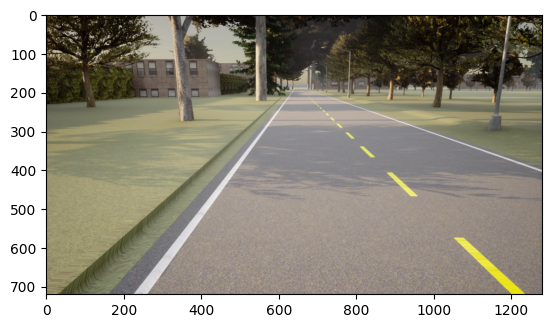

In [7]:
plt.imshow(images[0]) # 12.5

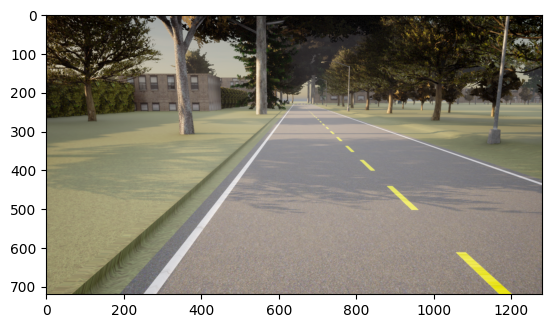

In [7]:
# plt.imshow(images[0]) # 10

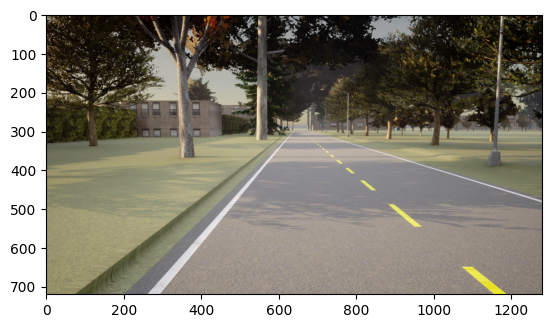

In [9]:
# plt.imshow(images[0]) # 5

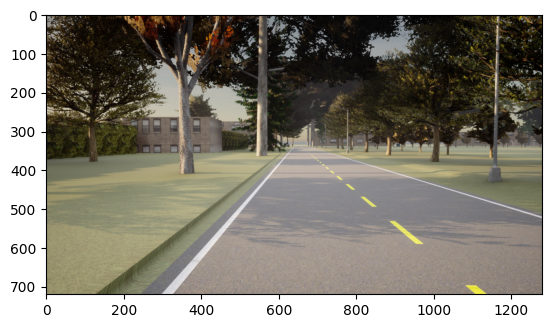

In [9]:
# plt.imshow(images[0]) # 2

In [8]:
world.reset()

Destroying all spawned actors
Destroying  <environment.tools.actor_wrapper.VehicleActor object at 0x77cd8c5a6fa0> ...
Destroying  <environment.tools.actor_wrapper.RGBCamera object at 0x77cd90ce94c0> ...


In [17]:
actors1 = world.get_actors()
for actor in actors1:
    print(actor)

len(actors1)

Actor(id=129, type=traffic.speed_limit.30)
Actor(id=128, type=traffic.speed_limit.30)
Actor(id=127, type=traffic.speed_limit.30)
Actor(id=126, type=traffic.speed_limit.30)
Actor(id=125, type=traffic.speed_limit.30)
Actor(id=124, type=traffic.speed_limit.30)
Actor(id=123, type=traffic.speed_limit.30)
Actor(id=122, type=traffic.speed_limit.30)
Actor(id=121, type=traffic.speed_limit.30)
Actor(id=120, type=traffic.speed_limit.30)
Actor(id=119, type=traffic.speed_limit.30)
Actor(id=118, type=traffic.speed_limit.30)
Actor(id=117, type=traffic.speed_limit.30)
Actor(id=116, type=traffic.speed_limit.30)
Actor(id=115, type=traffic.speed_limit.30)
Actor(id=114, type=traffic.speed_limit.30)
Actor(id=113, type=traffic.speed_limit.30)
Actor(id=112, type=traffic.speed_limit.30)
Actor(id=111, type=traffic.speed_limit.30)
Actor(id=110, type=traffic.speed_limit.30)
Actor(id=109, type=traffic.speed_limit.30)
Actor(id=108, type=traffic.speed_limit.30)
Actor(id=107, type=traffic.speed_limit.30)
Actor(id=10

43

## test full-env

In [1]:
import sys
import os

# Add the current working directory to sys.path
sys.path.append(os.path.abspath('..'))

# Print sys.path to verify the change
print(sys.path)

['/home/lpr/project_nattabude/carla/self-driving-sb3/notebook', '/home/lpr', '/home/lpr/miniconda3/envs/TRT86/lib/python38.zip', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8/lib-dynload', '', '/home/lpr/miniconda3/envs/TRT86/lib/python3.8/site-packages', '/home/lpr/project_nattabude/carla/self-driving-sb3']


initialize neccesory module

In [2]:
# import gc
# gc.set_debug(gc.DEBUG_LEAK)
# gc.collect()
# print(gc.garbage)

In [2]:
# some module that may use later
import time
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
# semantic segmentation
from segmentation.seg_hf import HF_mask2Formermodel
from config.seg_config import mask2former_labelmap
modelrepo = "facebook/mask2former-swin-large-mapillary-vistas-semantic"
seg_model = HF_mask2Formermodel(model_repo=modelrepo,fp16=True,label_mapping=mask2former_labelmap,crop=(512,1024))

/home/lpr/miniconda3/envs/TRT86/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


===== Segmentation =====
using  cuda
inference time :0.083532


In [4]:
# variational autoencoder
from autoencoder.vae_wrapper import VencoderWrapper,DecoderWrapper
vae_encoder = VencoderWrapper(model_path="../autoencoder/model/vae32/best/var_encoder_model.pth",latent_dims=32)
vae_decoder = DecoderWrapper(model_path="../autoencoder/model/vae32/best/decoder_model.pth",latent_dims=32)

===== Encoder =====
using cuda
inference time :0.002971
===== Decoder =====
using cuda
inference time :0.002003


In [5]:
# observer module (convert raw input to proper state)
# donb't need vae_decoder if not reconstruct the latent
from environment.tools.observer import SegVaeActHistObserver
observer1 = SegVaeActHistObserver(vae_encoder = vae_encoder,
                                  seg_model=seg_model,
                                  vae_decoder=vae_decoder,
                                  latent_space=32,
                                  num_img_input = 1,
                                  act_num=2,
                                  hist_len = 8,
                                  skip_frame=0)

In [6]:
# rewarder (object to calculate the reward for env)
from environment.tools.rewarder import RewardFromMap
rewarder1 = RewardFromMap(mask_path="../environment/rewardmask/ait_map/ait_football.png")

In [9]:
# action wrapper (object to post process the action like smooth, limit range or discretize)
from environment.tools.action_wraper import LimitAction,OriginAction
# from config.env.action_config import limit_action1
# action_wrapper = LimitAction(limit_action1,stable_steer=True)

In [10]:
action_wrapper = OriginAction()

In [18]:

# carla environment
from environment.CarlaEnv import CarlaImageEnv

from config.env.camera import front_cam,left_cam
from config.env.spawn_points import ait_football_spawn
from config.env.env_config import env_config_base

env = CarlaImageEnv(observer=observer1,
                rewarder=rewarder1,   
                car_spawn=ait_football_spawn,
                spawn_mode='static',
                action_wrapper = action_wrapper, 
                cam_config_list=[front_cam], 
                discrete_actions = None,
                activate_render = True,
                seed=2024,
                render_raw=True,
                render_observer=True,
                rand_weather=False)



using continuous space steer = [-1,1] , throttle = [0,1]
initialize car actor
initialize obs actor
initialize colli actor
initialize spec actor


In [10]:
from stable_baselines3 import SAC,PPO
from sb3_contrib import RecurrentPPO

In [11]:

from stable_baselines3.common.evaluation import evaluate_policy

In [12]:
model = SAC('MlpPolicy', env, verbose=1, seed=2024, tensorboard_log="../runs/RL", device='cuda')

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/lpr/miniconda3/envs/TRT86/lib/python3.8/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


In [13]:
model.learn(total_timesteps=10000)

Logging to ../runs/RL/SAC_6
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 82       |
|    ep_rew_mean     | 1.98     |
| time/              |          |
|    episodes        | 4        |
|    fps             | 10       |
|    time_elapsed    | 31       |
|    total_timesteps | 328      |
| train/             |          |
|    actor_loss      | -3.11    |
|    critic_loss     | 0.419    |
|    ent_coef        | 0.935    |
|    ent_coef_loss   | -0.228   |
|    learning_rate   | 0.0003   |
|    n_updates       | 227      |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 116      |
|    ep_rew_mean     | -1       |
| time/              |          |
|    episodes        | 8        |
|    fps             | 10       |
|    time_elapsed    | 88       |
|    total_timesteps | 932      |
| train/             |          |
|    actor_loss      | -4.94    |
|    critic_loss    

In [14]:
# fix terminated by -reward to more specific
# valkan memory

In [15]:
# model = RecurrentPPO("MlpLstmPolicy", "CartPole-v1", verbose=1)

check env play loop

In [ ]:
arr

In [16]:
try:
    for _ in range(1):
        observation = env.reset()
        done = False

        act,_ = model.predict(observation.reshape(1,272))
        while True:
            observation, reward, done, _ = env.step(act)
            if done :
                break

except Exception as e:
    print(e)

finally:

    env.close()

'SAC' object is not callable
Destroying all spawned actors
Destroying  <environment.tools.actor_wrapper.VehicleActor object at 0x76d886926be0> ...
Destroying  <environment.tools.actor_wrapper.RGBCamera object at 0x76d886926c10> ...
Destroying  <environment.tools.actor_wrapper.CollisionSensor object at 0x76d886926820> ...


In [24]:
action = model.predict(observation.reshape((1,272)))

In [25]:
action

(array([0.79448426, 0.94838136], dtype=float32), None)

In [17]:
env.close()

Destroying all spawned actors


In [18]:
observation.shape

(272,)

## test config

In [2]:
from config.trainRL_config import RL1

pygame 2.5.2 (SDL 2.28.2, Python 3.8.19)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
RL1

{'observer_config': {'latent_space': 32,
  'num_img_input': 1,
  'act_num': 2,
  'hist_len': 8,
  'skip_frame': 0},
 'seg_config': {'model_repo': 'facebook/mask2former-swin-large-mapillary-vistas-semantic',
  'fp16': True,
  'label_mapping': {13: 1,
   7: 1,
   23: 2,
   24: 2,
   52: 3,
   55: 3,
   57: 3,
   20: 4,
   21: 4,
   22: 4,
   19: 4},
  'crop': (512, 1024)},
 'vencoder_config': {'model_path': 'autoencoder/model/vae32/best/var_encoder_model.pth',
  'latent_dims': 32},
 'decoder_config': {'model_path': 'autoencoder/model/vae32/best/decoder_model.pth',
  'latent_dims': 32},
 'env_config': {'car_spawn': [{'Location': (-573.5, -223.5, 0.2),
    'Rotation': (0, 270, 0)},
   {'Location': (-490.1, -369.2, 0.2), 'Rotation': (0, 0, 0)},
   {'Location': (-347.4, -273.5, 0.2), 'Rotation': (0, 90, 0)},
   {'Location': (-361, -142.9, 0.2), 'Rotation': (0, 180, 0)},
   {'Location': (-561.1, -149.3, 0.2), 'Rotation': (0, 182, 0)}],
  'spawn_mode': 'static',
  'env_config': {'host': 'local

In [4]:
import json
config_path = "../RLmodel/SAC_6_testrun/config.json"

with open(config_path, 'r') as file:
    CONFIG = json.load(file)

CONFIG['env_config']['seed'] = 1234

In [15]:
RL1['env_config']

{'car_spawn': [{'Location': (-573.5, -223.5, 0.2), 'Rotation': (0, 270, 0)},
  {'Location': (-490.1, -369.2, 0.2), 'Rotation': (0, 0, 0)},
  {'Location': (-347.4, -273.5, 0.2), 'Rotation': (0, 90, 0)},
  {'Location': (-361, -142.9, 0.2), 'Rotation': (0, 180, 0)},
  {'Location': (-561.1, -149.3, 0.2), 'Rotation': (0, 182, 0)}],
 'spawn_mode': 'static',
 'env_config': {'host': 'localhost',
  'port': 2000,
  'vehicle': 'evt_echo_4s',
  'delta_frame': 0.2,
  'check_reverse': 32,
  'max_step': 1200},
 'cam_config_list': [{'name': 'front_camera',
   'type': 'sensor.camera.rgb',
   'attribute': {'image_size_x': 1280,
    'image_size_y': 720,
    'fov': 78,
    'sensor_tick': 0.001},
   'AttachmentType': carla.libcarla.AttachmentType.Rigid,
   'tag': 'obs',
   'Location': (0.98, 0, 1.675),
   'Rotation': (-12.5, 0, 0)}],
 'discrete_actions': None,
 'seed': 2024,
 'rand_weather': False}

In [5]:
from utils import write_pickle

In [11]:
write_pickle(RL1['env_config'],'')


In [16]:
model_path = "RLmodel/SAC_6_testrun/model_100000_steps.zip"
seed = 2024
record = True

dir = os.path.dirname(model_path)
checkpoint_name = os.path.basename(model_path)
print(checkpoint_name)

model_100000_steps.zip


In [7]:
import pickle

In [12]:
with open('config.pkl','rb') as f:
    env_config = pickle.load(f)

In [14]:
env_config['cam_config_list'][0]['AttachmentType']

carla.libcarla.AttachmentType(0)

In [8]:
def ye(a,b,c):
    print(a,b,c)

In [13]:
ye(*CONFIG['env_config']['car_spawn'][0]['Location'])

-573.5 -223.5 0.2


In [1]:
import pandas as pd

df = pd.read_csv("../recorded/SAC_3/infos.csv")

In [2]:
df

,step,location,reward,total_reward,total_distance,speed,avg_speed,steer,mean_reward
0,1,"(-573.5, -223.5)",0.033357,0.033357,0.000000,0.120085,2.753689,0.711263,0.000000
1,2,"(-573.5, -223.5)",-1.392495,-1.359137,0.000000,0.108112,1.430901,0.756077,0.016679
2,3,"(-573.5, -223.5)",-0.072308,-1.431446,0.000000,0.062355,0.974719,0.678642,-0.453046
3,4,"(-573.5, -223.5)",-0.148040,-1.579485,0.000000,0.024592,0.737187,0.405371,-0.357861
4,5,"(-573.5, -223.5)",-0.545603,-2.125088,0.000000,0.003383,0.590426,0.449566,-0.315897
...,...,...,...,...,...,...,...,...,...
1311,259,"(-570.1077880859375, -358.3087463378906)",-0.237074,479.206606,136.457855,0.075709,9.585745,0.695914,1.851134
1312,260,"(-570.10498046875, -358.3111572265625)",-0.071707,479.134899,136.461556,0.068683,9.549141,0.698580,1.843102
1313,261,"(-570.1025390625, -358.31341552734375)",-0.005333,479.129566,136.464881,0.061981,9.512792,0.730680,1.835766
1314,262,"(-570.1002807617188, -358.3152160644531)",-0.064200,479.065366,136.467770,0.054169,9.476690,0.667472,1.828739


In [3]:
%matplotlib tk

In [4]:
import matplotlib.pyplot as plt

In [7]:
# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(df['steer'], df['step'], marker='o')

# Adding titles and labels
plt.title('Steer vs Step')
plt.xlabel('Steer')
plt.ylabel('Step')

# Show grid
plt.grid(True)

# Display the plot
plt.show()

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['steer'], bins=30, edgecolor='black')
plt.title('Distribution of Steer Angles')
plt.xlabel('Steer')
plt.ylabel('Frequency')
plt.show()

# Calculate and display descriptive statistics
mean_steer = df['steer'].mean()
median_steer = df['steer'].median()
std_steer = df['steer'].std()
min_steer = df['steer'].min()
max_steer = df['steer'].max()

print(f'Mean Steer: {mean_steer}')
print(f'Median Steer: {median_steer}')
print(f'Standard Deviation of Steer: {std_steer}')
print(f'Min Steer: {min_steer}')
print(f'Max Steer: {max_steer}')

Mean Steer: 0.05251144971528676
Median Steer: 0.0481751918792724
Standard Deviation of Steer: 0.32408516438235624
Min Steer: -0.7172275066375733
Max Steer: 0.7897947311401368
